### Graph Name: Distribution of Cycle Lengths (Max Matching)
### Description:
This graph gives the distribution of cycle sizes and analyses it's functional form as n $\to \infty$.


#### Simulation Code: 
Should only run this if you want to generate new data. Otherwise, skip to the next section to load the data. If you do, just uncomment section below. 

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [117]:
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [118]:
def prep(k):
    df = pd.read_csv(f'data/simulations/max_length_matches/n_1000_k_{k}_max_length_diff.csv')
    df = df.sort_values(by=['cycle_lengths']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    df['binned'] = pd.cut(df['cycle_lengths'], bins = 35)
    df['binned'] = df["binned"].apply(lambda x: x.mid)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['log'] = np.log(x[0])
    return x

In [119]:
from scipy import stats

Text(0.5, 0, 'Cycle Lengths')

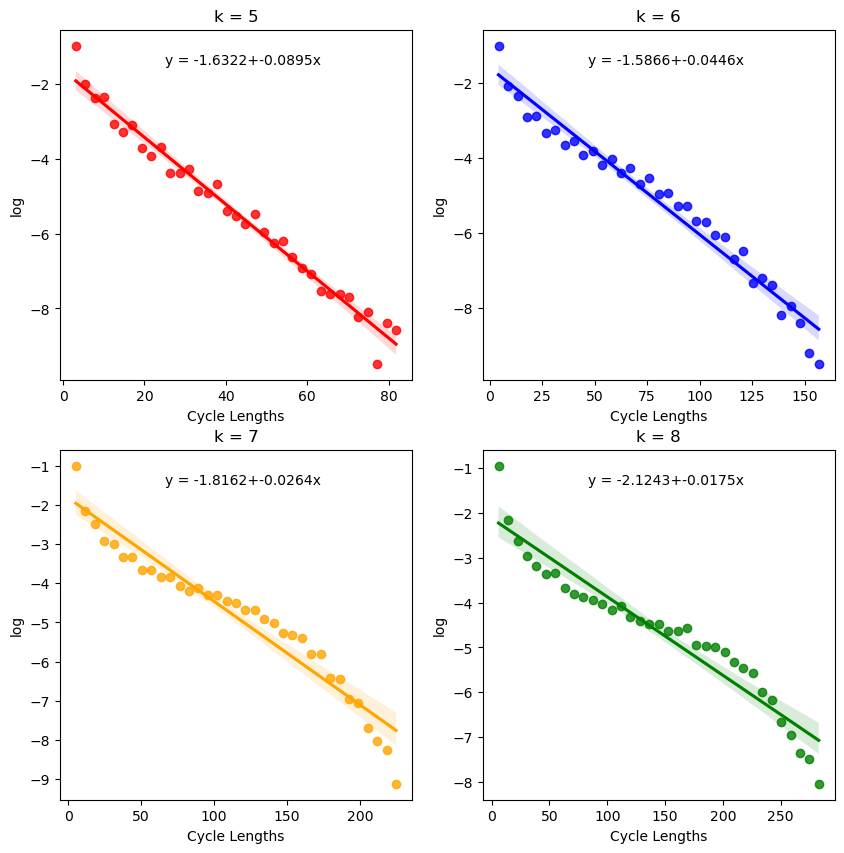

In [121]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

df = prep(5)
sns.regplot(x='binned', y='log', data=df, ax=ax[0, 0], color='red')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 0].text(0.3, 0.9, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[0,0].transAxes)
ax[0,0].set_title('k = 5')
ax[0,0].set_xlabel('Cycle Lengths')


df = prep(6)
sns.regplot(x='binned', y='log', data=prep(6), ax=ax[0, 1], color = 'blue')
res2 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 1].text(0.3, 0.9, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,1].transAxes)
ax[0,1].set_title('k = 6')
ax[0,1].set_xlabel('Cycle Lengths')

df = prep(7)
sns.regplot(x='binned', y='log', data=prep(7), ax=ax[1, 0], color = 'orange')
res3 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 0].text(0.3, 0.9, 'y = ' + str(round(res3.intercept, 4))+'+'+str(round(res3.slope,4))+'x', transform=ax[1,0].transAxes)
ax[1,0].set_title('k = 7')
ax[1,0].set_xlabel('Cycle Lengths')

df = prep(8)
sns.regplot(x='binned', y='log', data=prep(8), ax=ax[1, 1], color= 'green')
res4 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 1].text(0.3, 0.9, 'y = ' + str(round(res4.intercept, 4))+'+'+str(round(res4.slope,4))+'x', transform=ax[1,1].transAxes)
ax[1,1].set_title('k = 8')
ax[1,1].set_xlabel('Cycle Lengths')

In [111]:
df

,binned,0,log
0,1,0.290856,-1.234929
1,2,0.199726,-1.610807
2,3,0.130064,-2.039727
3,4,0.094391,-2.360307
4,5,0.069031,-2.673202
5,6,0.000000,-inf
6,7,0.047669,-3.043471
7,8,0.037672,-3.278830
8,9,0.027781,-3.583414
9,10,0.025676,-3.662195


<Axes: xlabel='binned', ylabel='log'>

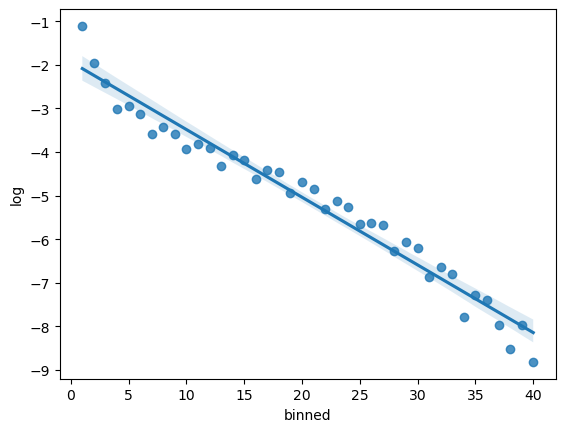

In [95]:
sns.regplot(x = 'binned', y = 'log', data = x, fit_reg = True)

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15))
sns.axes_style("whitegrid")
sns.regplot(x = 'n', y = 'value', data = df2[df2['k']==2], ax=axs[0])
res1 = stats.linregress(df2[df2['k']==2]['n'], df2[df2['k']==2]['value'])
axs[0].text(0.3, 0.9, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=axs[0].transAxes)
sns.regplot(x = 'n', y = 'value', data = df2[df2['k']==3],color = 'red', ax=axs[1])
res2 = stats.linregress(df2[df2['k']==3]['n'], df2[df2['k']==3]['value'])
axs[1].text(0.5, 0.9, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope, 4))+'x', transform=axs[1].transAxes)

sns.regplot(x = 'n', y = 'value', data = df2[df2['k']==4], color= 'green',ax=axs[2])

res3 = stats.linregress(df2[df2['k']==4]['n'], df2[df2['k']==4]['value'])
axs[2].text(0.5, 0.9, 'y = ' + str(round(res3.intercept,4))+'+'+str(round(res3.slope,4))+'x', transform=axs[2].transAxes)

axs[0].set_title('k=2')
axs[1].set_title('k=3')
axs[2].set_title('k=4')